In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors

%matplotlib widget

In [2]:
file_dir = "images\\PyTorch_t1010_100858_mFalse_ep80_bs64_nm30_mp0.02_mi4\\logs\\"
files_list = [f"stats_{i}.csv" for i in range(4, 81, 4)]

In [3]:
smooth = 500

In [4]:
df_list = []
for ind, file in enumerate(files_list):
    df_list.append(pd.read_csv(file_dir + file))
    df_list[ind]["smoothed_g_loss"] = df_list[ind].g_loss.rolling(smooth, center=True).mean()
    df_list[ind]["smoothed_d_loss"] = df_list[ind].d_loss.rolling(smooth, center=True).mean()

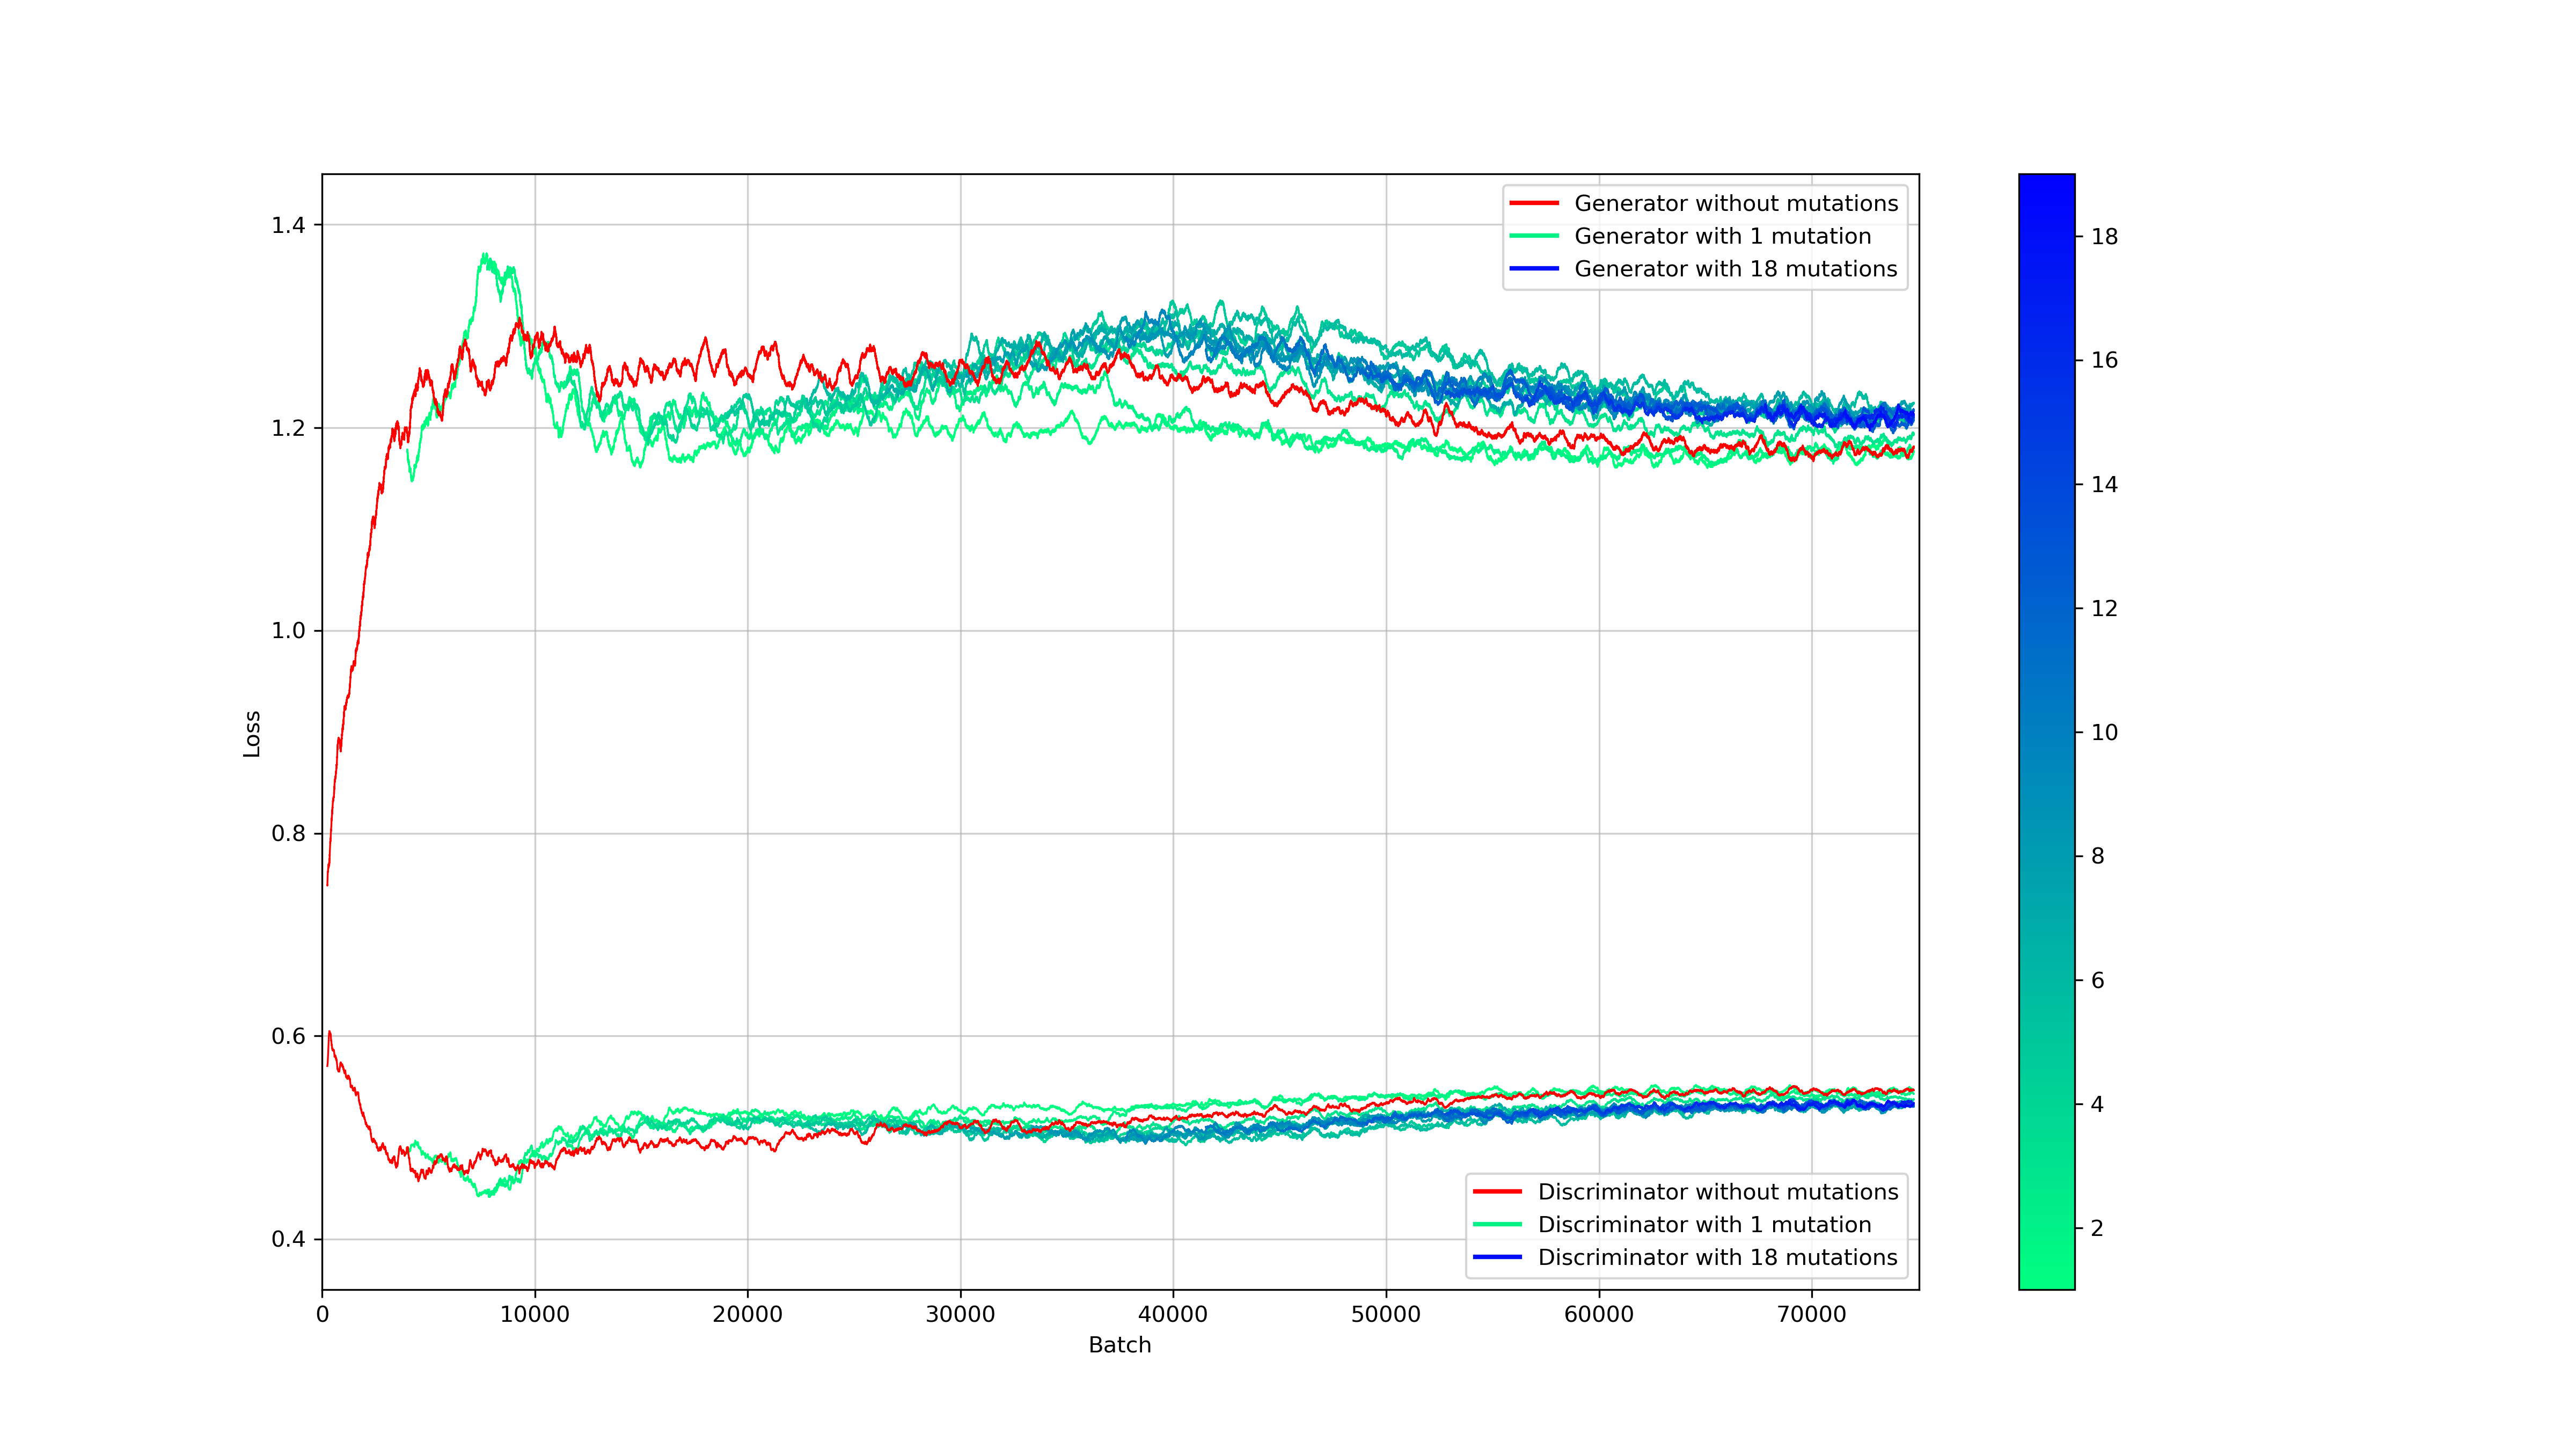

In [94]:
# plt.style.use("seaborn-whitegrid")
plt.style.use("default")
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] =  300

color_list = cm.get_cmap("winter_r", 20)(np.linspace(0, 1, 20))

lines_g, lines_d = [], []
fig, ax = plt.subplots()
for ind, df in enumerate(df_list[1:]):
    lines_g.append(ax.plot(df.batch, df.smoothed_g_loss, lw=0.8, c=color_list[ind]))
    lines_d.append(ax.plot(df.batch, df.smoothed_d_loss, lw=0.8, c=color_list[ind]))
    
line_gr = ax.plot(df_list[0].batch, df_list[0].smoothed_g_loss, label=f"Generator without mutations", lw=0.8, c="red")
line_dr = ax.plot(df_list[0].batch, df_list[0].smoothed_d_loss, label=f"Discriminator without mutations", lw=0.8, c="red")

lines_g[1][0].set_label("Generator with 1 mutation")
line_gr.append(lines_g[1][0])
lines_g[-1][0].set_label("Generator with 18 mutations")
line_gr.append(lines_g[-1][0])

lines_d[1][0].set_label("Discriminator with 1 mutation")
line_dr.append(lines_d[1][0])
lines_d[-1][0].set_label("Discriminator with 18 mutations")
line_dr.append(lines_d[-1][0])

first_legend = ax.legend(handles=line_gr, loc='upper right')
fig.gca().add_artist(first_legend)
second_legend = ax.legend(handles=line_dr, loc='lower right')

for legobj in first_legend.legendHandles:
    legobj.set_linewidth(2.0)
for legobj in second_legend.legendHandles:
    legobj.set_linewidth(2.0)

norm = colors.Normalize(vmin=1, vmax=19)
plt.colorbar(cm.ScalarMappable(norm=norm, cmap="winter_r"))
# ax.hlines(y=1.12, 
#           xmin=0, 
#           xmax=75040,
#           color=virdis_colors[-1], alpha=0.6,
#           linestyle='--', linewidth=1
#          )
# ax.hlines(y=1.30, 
#           xmin=0, 
#           xmax=75040,
#           color="red", alpha=0.6,
#           linestyle='--', linewidth=1
#          )
# ax.set_title("Generator and discriminator loss plot")
ax.set_ylabel("Loss")
ax.set_xlabel("Batch")

ax.grid(True, which='major', alpha=0.6)
ax.set_xlim(0, 75040)
ax.set_ylim(0.35, 1.45)

# plt.savefig("plot_2.png", dpi=300)
None

In [58]:
len(df_list[0])

75040